# 데이터 불러오기

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\user\\DataSience\\data\\basketball.csv')

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [6]:
df.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [39]:
df.head(1)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1


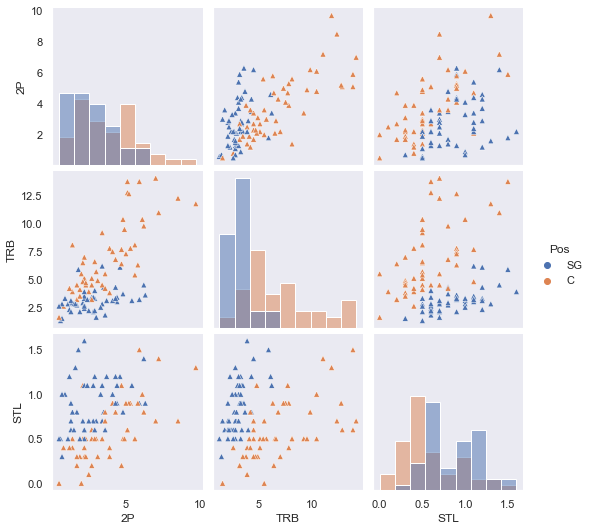

In [201]:
sns.pairplot(df, markers='^', hue='Pos', diag_kind="hist")

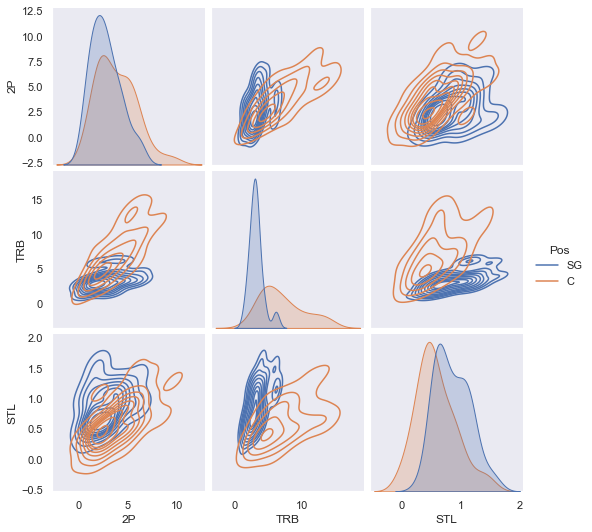

In [203]:
sns.pairplot(df, hue='Pos', kind="kde")

Text(0.5, 1.0, '3P, 2P')

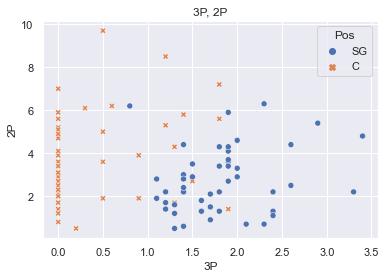

In [137]:
sns.set_theme(style="dark")
sns.scatterplot(data=df, x='3P', y='2P', 
                hue='Pos', style='Pos')
plt.grid()
plt.title('3P, 2P')

Text(0.5, 1.0, 'TRB, AST')

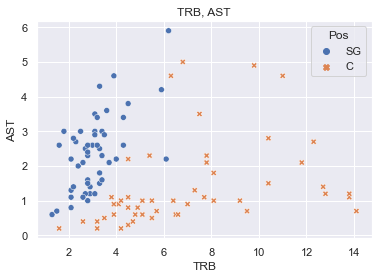

In [133]:
sns.set_theme(style="dark")
sns.scatterplot(data=df, x='TRB', y='AST', hue='Pos', style='Pos')
plt.grid()
plt.title('TRB, AST')

Text(0.5, 1.0, 'STL, BLK')

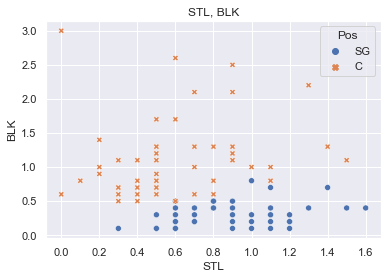

In [132]:
sns.set_theme(style="dark")
sns.scatterplot(data=df, x='STL', y='BLK', hue='Pos', style='Pos')
plt.grid()
plt.title('STL, BLK')

Text(0.5, 1.0, '2P, TRB')

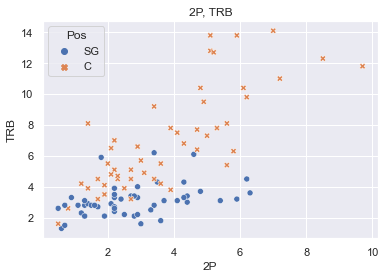

In [131]:
sns.set_theme(style="dark")
sns.scatterplot(data=df, x='2P', y='TRB', 
                hue='Pos', style='Pos')
plt.grid()
plt.title('2P, TRB')

Text(0.5, 1.0, '2p, AST')

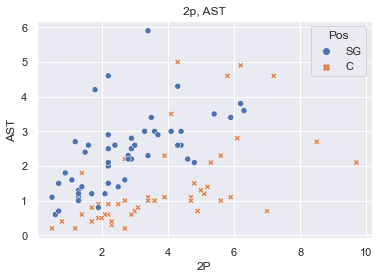

In [139]:
sns.set_theme(style='dark')
sns.scatterplot(data=df, x='2P', y='AST',
               hue='Pos', style='Pos')
plt.grid()
plt.title('2p, AST')

Text(0.5, 1.0, '2P, STL')

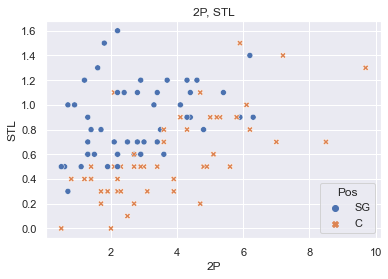

In [144]:
sns.set_theme(style='dark')
sns.scatterplot(data=df, x='2P', y='STL', hue='Pos', style='Pos')
plt.grid()
plt.title('2P, STL')

Text(0.5, 1.0, '2P, BLK')

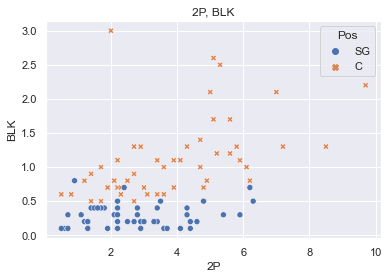

In [145]:
sns.set_theme(style='dark')
sns.scatterplot(data=df, x='2P', y='BLK', hue='Pos', style='Pos')
plt.grid()
plt.title('2P, BLK')

In [128]:
df.head(1)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1


In [8]:
df.isna().sum()

Player    0
Pos       0
3P        0
2P        0
TRB       0
AST       0
STL       0
BLK       0
dtype: int64

In [148]:
df.drop(['BLK', '3P', 'AST'], axis=1, inplace=True) 
df.head()

,Player,Pos,2P,TRB,STL
0,Alex Abrines,SG,0.6,1.3,0.5
1,Steven Adams,C,4.7,7.7,1.1
2,Alexis Ajinca,C,2.3,4.5,0.5
3,Chris Andersen,C,0.8,2.6,0.4
4,Will Barton,SG,3.5,4.3,0.8


# KNN 모델 생성

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = df[['2P', 'TRB', 'STL']], df['Pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [170]:
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [171]:
print('테스트 세트 예측', clf.predict(X_test))

테스트 세트 예측 ['C' 'C' 'SG' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'SG' 'C']


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [172]:
print('테스트 세트 정확도: {:.2f}'.format( clf.score(X_test, y_test)))

테스트 세트 정확도: 0.85


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [173]:
comparison = pd.DataFrame({'예측값': y_pred, '실제값': y_test})
comparison

,예측값,실제값
83,SG,C
53,SG,C
70,C,SG
45,SG,SG
44,C,C
39,C,SG
22,C,SG
80,SG,SG
10,C,C
0,C,SG
